In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress



In [173]:
csvpath = '/Users/laceymorgan/Desktop/zillow/City_zhvi_month_2_14_2023.csv'
csvpath2 = '/Users/laceymorgan/Desktop/zillow/Metro_invt_2._14_2023.csv'
csvpath3 = '/Users/laceymorgan/Desktop/zillow/Metro_median list_prices_2_15_2023.csv'
csvpath4 = '/Users/laceymorgan/Desktop/zillow/Metro_median_sale_price_2_15_2023.csv'
df = pd.read_csv(csvpath)
df2 = pd.read_csv(csvpath2)
df3 = pd.read_csv(csvpath3)
df4 = pd.read_csv(csvpath4)
df3.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,...,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31
0,102001,0,United States,country,NaN,263267.0,271267.0,276633.0,280000.0,280300.0,...,364967.0,379200.0,390533.0,396900.0,396000.0,392967.0,388300.0,384633.0,379633.0,374600.0
1,394913,1,"New York, NY",msa,NY,503000.0,513000.0,521300.0,526300.0,528300.0,...,631633.0,641300.0,647967.0,642333.0,634333.0,627967.0,632633.0,637633.0,640967.0,639967.0
2,753899,2,"Los Angeles, CA",msa,CA,721333.0,735000.0,743333.0,750000.0,749667.0,...,924800.0,941633.0,949966.0,949333.0,941000.0,931000.0,914997.0,906330.0,899330.0,899000.0
3,394463,3,"Chicago, IL",msa,IL,284600.0,294600.0,300600.0,302267.0,301967.0,...,309300.0,317967.0,323300.0,323399.0,320066.0,316733.0,313000.0,307967.0,302300.0,298967.0
4,394514,4,"Dallas, TX",msa,TX,322997.0,328497.0,331797.0,332800.0,329502.0,...,406000.0,416667.0,430000.0,436333.0,434667.0,427967.0,418300.0,409967.0,403000.0,396366.0


In [28]:
df.dtypes

RegionID        int64
SizeRank        int64
RegionName     object
RegionType     object
StateName      object
               ...   
2022-09-30    float64
2022-10-31    float64
2022-11-30    float64
2022-12-31    float64
2023-01-31    float64
Length: 285, dtype: object

In [80]:
# creating data frames of just the target cities median home values over time
mpls = df.loc[(df['RegionName'] == 'Minneapolis') & (df['State'] == 'MN')].copy()
prt = df.loc[(df['RegionName'] == 'Portland') & (df['State'] == 'OR')].copy()
stl = df.loc[(df['RegionName'] == 'Seattle') & (df['State'] == 'WA')].copy()
bldr = df.loc[(df['RegionName'] == 'Boulder') & (df['State'] == 'CO')].copy()


In [83]:
mpls.iloc[:, 8:]

,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,...,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31
51,106832.698316,107450.013393,107993.554198,109258.184728,110611.210108,112199.858728,113966.695003,116259.126244,118467.57306,120579.004409,...,316853.12323,320752.960772,323771.680825,324428.109974,323146.24998,320591.261794,318845.260335,317882.824909,316790.600152,315588.378421


In [116]:
# get a Series indicating which columns have at least one NaN value
has_nans = bldr.isna().any()

# filter the DataFrame to only include columns with at least one NaN value
df_filtered = bldr.loc[:, has_nans]

print(df_filtered)

Empty DataFrame
Columns: []
Index: [274]


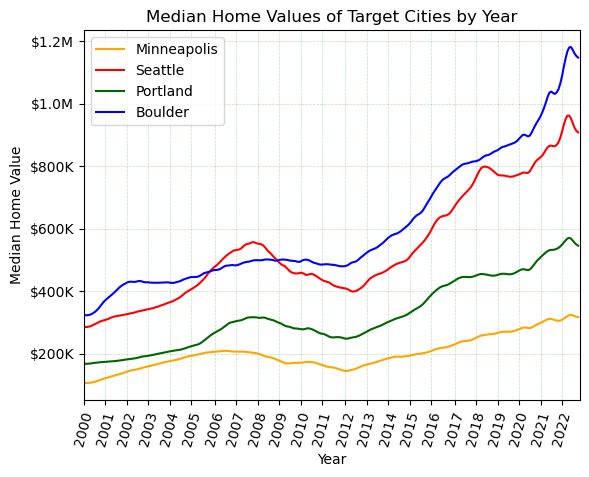

<Figure size 2000x600 with 0 Axes>

In [105]:
# plotting all 4 target cities over the entire course of the data
# converting the data to float type, float64 type was causing an error
mpls.iloc[:, 9:] = mpls.iloc[:, 8:].astype(float)
stl.iloc[:, 9:] = stl.iloc[:, 8:].astype(float)
prt.iloc[:, 9:] = prt.iloc[:, 8:].astype(float)
bldr.iloc[:, 9:] = bldr.iloc[:, 8:].astype(float)

# select the relevant columns for plotting
mpls_data = mpls.iloc[0, 8:]
stl_data = stl.iloc[0, 8:]
prt_data = prt.iloc[0, 8:]
bldr_data = bldr.iloc[0, 8:]

# create the line plot
plt.plot(mpls_data, label='Minneapolis', color='orange')
plt.plot(stl_data, label='Seattle', color='red')
plt.plot(prt_data, label='Portland', color='darkgreen')
plt.plot(bldr_data, label='Boulder', color='blue')

# add labels and a title
plt.xlabel('Year')
plt.ylabel('Median Home Value')
plt.title('Median Home Values of Target Cities by Year')

# create a list of x-tick labels with 6 month intervals
dates = pd.date_range(start='2000-01-31', end='2023-01-31', freq='12M')
labels = [date.strftime('%Y') for date in dates]

# convert the dates to integer positions representing the number of months since the start date
start = pd.Timestamp('2000-01-31')
positions = [(date - start).days // 30 for date in dates]

# set the x-ticks and labels
plt.xticks(positions, labels, rotation=75)

# format the y-axis labels to display values in millions of dollars with a decimal place
plt.gca().get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: '${:,.1f}M'.format(x / 1000000) if x >= 1000000 else '${:,.0f}K'.format(x / 1000)))

# set proporties for the grid 
plt.grid(alpha= .25, color = 'green', linestyle = '--', linewidth = 0.5)

# set the x-limits
plt.xlim(0, len(mpls_data))

# add a legend
plt.legend(loc='best')

# set the figure size
plt.figure(figsize=(20, 6))

# show the plot
plt.show()




In [ ]:
mpls.dtypes

The correlation coefficient (r) for the Minneapolis data is: 0.8295015148483925
The correlation coefficient (r) for the Seattle data is: 0.8951297107180802
The correlation coefficient (r) for the Portland data is: 0.9341424226961695
The correlation coefficient (r) for the Boulder data is: 0.9180975841257187


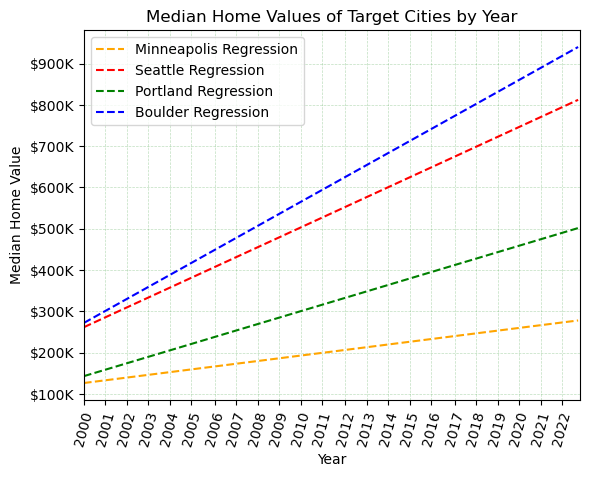

<Figure size 2000x600 with 0 Axes>

In [128]:
# just the minneapolis value with its line regression

mpls_data = pd.to_numeric(mpls.iloc[0, 8:], errors='coerce')
stl_data = pd.to_numeric(stl.iloc[0, 8:], errors='coerce')
prt_data = pd.to_numeric(prt.iloc[0, 8:], errors='coerce')
bldr_data = pd.to_numeric(bldr.iloc[0, 8:], errors='coerce')


# drop NaN values
mpls_data = mpls_data.dropna()
stl_data = stl_data.dropna()
prt_data = prt_data.dropna()
bldr_data = bldr_data.dropna()

# calculate the slope of each line using linregress() and create equation of line
(mpls_slope, mpls_int, mpls_r, mpls_p, mpls_std_err) = linregress(np.arange(len(mpls_data)), mpls_data)
mpls_fit = (mpls_slope * np.arange(len(mpls_data))) + mpls_int
# print the r value
print("The correlation coefficient (r) for the Minneapolis data is:", mpls_r)

# calculate the slope of each line using linregress() and create equation of line
(stl_slope, stl_int, stl_r, stl_p, stl_std_err) = linregress(np.arange(len(stl_data)), stl_data)
stl_fit = (stl_slope * np.arange(len(stl_data))) + stl_int
# print the r value
print("The correlation coefficient (r) for the Seattle data is:", stl_r)

# calculate the slope of each line using linregress() and create equation of line
(prt_slope, prt_int, prt_r, prt_p, prtl_std_err) = linregress(np.arange(len(prt_data)), prt_data)
prt_fit = (prt_slope * np.arange(len(prt_data))) + prt_int
# print the r value
print("The correlation coefficient (r) for the Portland data is:", prt_r)

# calculate the slope of each line using linregress() and create equation of line
(bldr_slope, bldr_int, bldr_r, bldr_p, bldr_std_err) = linregress(np.arange(len(bldr_data)), bldr_data)
bldr_fit = (bldr_slope * np.arange(len(bldr_data))) + bldr_int
# print the r value
print("The correlation coefficient (r) for the Boulder data is:", bldr_r)

# create the line plot
# plt.plot(mpls_data, label='Minneapolis', color='orange')
# plt.plot(stl_data, label='Seattle', color='red')
# plt.plot(stl_data, label='Portland', color='green')
# plt.plot(stl_data, label='Boulder', color='blue')

# plot the regression lines for each city
plt.plot(mpls_fit, label='Minneapolis Regression', color='orange', linestyle='--')
plt.plot(stl_fit, label='Seattle Regression', color='red', linestyle='--')
plt.plot(prt_fit, label='Portland Regression', color='green', linestyle='--')
plt.plot(bldr_fit, label='Boulder Regression', color='blue', linestyle='--')


# add labels and a title
plt.xlabel('Year')
plt.ylabel('Median Home Value')
plt.title('Median Home Values of Target Cities by Year')

dates = pd.date_range(start='2000-01-31', end='2023-01-31', freq='12M')
labels = [date.strftime('%Y') for date in dates]

# convert the dates to integer positions representing the number of months since the start date
start = pd.Timestamp('2000-01-31')
positions = [(date - start).days // 30 for date in dates]

# set the x-ticks and labels
plt.xticks(positions, labels, rotation=75)

# format the y-axis labels to display values in millions of dollars with a decimal place
plt.gca().get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: '${:,.1f}M'.format(x / 1000000) if x >= 1000000 else '${:,.0f}K'.format(x / 1000)))

# set proporties for the grid 
plt.grid(alpha= .25, color = 'green', linestyle = '--', linewidth = 0.5)

# set the x-limits
plt.xlim(0, len(mpls_data))

# add a legend
plt.legend(loc='best')

# set the figure size
plt.figure(figsize=(20, 6))

# show the plot
plt.show()


* The correlation coefficients (r) for median home values in Minneapolis, Seattle, Portland, and Boulder are 0.83, 0.90, 0.93, and 0.92, respectively. These values suggest a moderate to strong positive correlation between the years and the median home values in each of these cities. The highest correlation is seen in Portland, indicating a stronger relationship between time and home values in that city compared to the others. However, it's worth noting that a correlation coefficient alone does not necessarily imply causation, and other factors may be influencing these trends. Nonetheless, these values provide insight into how the median home values have changed over time in these cities and can help inform decisions related to real estate and investment.

In [157]:
# creating data frames of just the target cities home inventory over time
mpls_inv = df2.loc[(df2['RegionName'] == 'Minneapolis, MN')].copy()
prt_inv = df2.loc[(df2['RegionName'] == 'Portland, OR')].copy()
stl_inv = df2.loc[(df2['RegionName'] == 'Seattle, WA')].copy()
bldr_inv = df2.loc[(df2['RegionName'] == 'Boulder, CO')].copy()

In [161]:
bldr_inv

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,...,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31
156,394405,156,"Boulder, CO",msa,CO,1022.0,1173.0,1359.0,1497.0,1558.0,...,717.0,909.0,1114.0,1255.0,1336.0,1322.0,1279.0,1152.0,968.0,785.0


In [142]:
df2.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,...,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31
0,102001,0,United States,country,NaN,1421529.0,1500193.0,1592413.0,1660612.0,1709141.0,...,758418.0,842516.0,927701.0,1012953.0,1071039.0,1080747.0,1065488.0,1014694.0,939856.0,868600.0
1,394913,1,"New York, NY",msa,NY,73707.0,80345.0,85864.0,90067.0,91881.0,...,47109.0,51197.0,54292.0,56794.0,57028.0,56203.0,54573.0,52210.0,47597.0,43381.0
2,753899,2,"Los Angeles, CA",msa,CA,21998.0,23784.0,25605.0,27109.0,28811.0,...,15425.0,16951.0,18425.0,20182.0,21357.0,21499.0,20945.0,19713.0,17911.0,16121.0
3,394463,3,"Chicago, IL",msa,IL,38581.0,42253.0,45757.0,47492.0,48984.0,...,23993.0,26443.0,28448.0,30255.0,31135.0,30782.0,29809.0,27762.0,24736.0,21865.0
4,394514,4,"Dallas, TX",msa,TX,24043.0,25876.0,28225.0,30490.0,32408.0,...,14963.0,16053.0,17750.0,20382.0,22258.0,22760.0,22348.0,21408.0,19895.0,18445.0


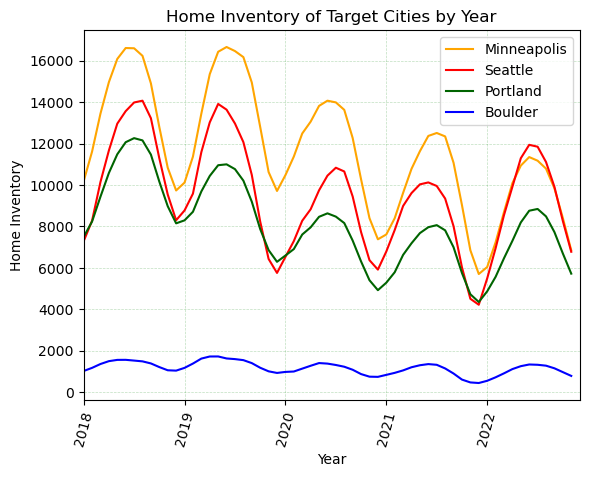

<Figure size 2000x600 with 0 Axes>

In [165]:
# plotting all 4 target cities inventory over the entire course of the data
# converting the data to float type, float64 type was causing an error
mpls_inv.iloc[0, 5:] = mpls_inv.iloc[0, 5:].astype(float)
stl_inv.iloc[0, 5:] = stl_inv.iloc[0, 5:].astype(float)
prt_inv.iloc[0, 5:] = prt_inv.iloc[0, 5:].astype(float)
bldr_inv.iloc[0, 5:] = bldr_inv.iloc[0, 5:].astype(float)

# select the relevant columns for plotting
mpls_inv_data = mpls_inv.iloc[0, 5:]
stl_inv_data = stl_inv.iloc[0, 5:]
prt_inv_data = prt_inv.iloc[0, 5:]
bldr_inv_data = bldr_inv.iloc[0, 5:]

# create the line plot
plt.plot(mpls_inv_data, label='Minneapolis', color='orange')
plt.plot(stl_inv_data, label='Seattle', color='red')
plt.plot(prt_inv_data, label='Portland', color='darkgreen')
plt.plot(bldr_inv_data, label='Boulder', color='blue')

# add labels and a title
plt.xlabel('Year')
plt.ylabel('Home Inventory')
plt.title('Home Inventory of Target Cities by Year')

# create a list of x-tick labels with 6 month intervals
dates = pd.date_range(start='2018-03-31', end='2023-01-31', freq='12M')
labels = [date.strftime('%Y') for date in dates]

# convert the dates to integer positions representing the number of months since the start date
start = pd.Timestamp('2018-03-31')
positions = [(date - start).days // 30 for date in dates]

# set the x-ticks and labels
plt.xticks(positions, labels, rotation=75)

# set proporties for the grid 
plt.grid(alpha= .25, color = 'green', linestyle = '--', linewidth = 0.5)

# set the x-limits
plt.xlim(0, len(mpls_inv_data))

# add a legend
plt.legend(loc='best')

# set the figure size
plt.figure(figsize=(20, 6))

# show the plot
plt.show()



In [150]:
# get a Series indicating which columns have at least one NaN value
has_nans = mpls_inv.isna().any()

# filter the DataFrame to only include columns with at least one NaN value
df_filtered = mpls_inv.loc[:, has_nans]

print(df_filtered)

Empty DataFrame
Columns: []
Index: []


In [168]:
# creating data frames of just the target cities median list prices over time
mpls_lst = df3.loc[(df3['RegionName'] == 'Minneapolis, MN')].copy()
prt_lst = df3.loc[(df3['RegionName'] == 'Portland, OR')].copy()
stl_lst = df3.loc[(df3['RegionName'] == 'Seattle, WA')].copy()
bldr_lst = df3.loc[(df3['RegionName'] == 'Boulder, CO')].copy()

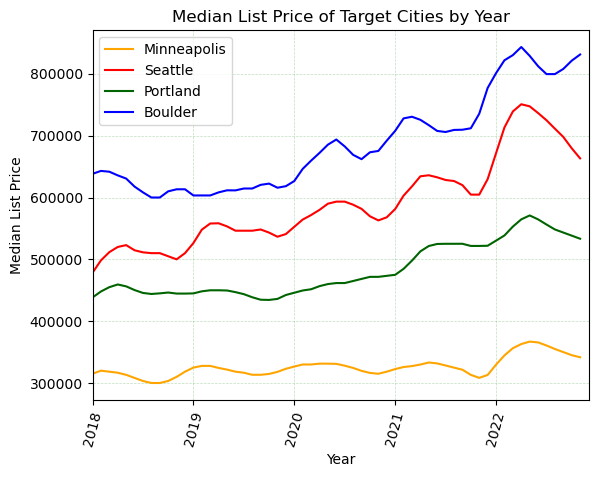

<Figure size 2000x600 with 0 Axes>

In [182]:
# plotting all 4 target cities meidan list prices over the entire course of the data
# converting the data to float type, float64 type was causing an error
mpls_lst.iloc[0, 5:] = mpls_lst.iloc[0, 5:].astype(float)
stl_lst.iloc[0, 5:] = stl_lst.iloc[0, 5:].astype(float)
prt_lst.iloc[0, 5:] = prt_lst.iloc[0, 5:].astype(float)
bldr_lst.iloc[0, 5:] = bldr_lst.iloc[0, 5:].astype(float)

# select the relevant columns for plotting
mpls_lst_data = mpls_lst.iloc[0, 5:]
stl_lst_data = stl_lst.iloc[0, 5:]
prt_lst_data = prt_lst.iloc[0, 5:]
bldr_lst_data = bldr_lst.iloc[0, 5:]

# create the line plot
plt.plot(mpls_lst_data, label='Minneapolis', color='orange')
plt.plot(stl_lst_data, label='Seattle', color='red')
plt.plot(prt_lst_data, label='Portland', color='darkgreen')
plt.plot(bldr_lst_data, label='Boulder', color='blue')

# add labels and a title
plt.xlabel('Year')
plt.ylabel('Median List Price')
plt.title('Median List Price of Target Cities by Year')

# create a list of x-tick labels with 6 month intervals
dates = pd.date_range(start='2018-03-31', end='2023-01-31', freq='12M')
labels = [date.strftime('%Y') for date in dates]

# convert the dates to integer positions representing the number of months since the start date
start = pd.Timestamp('2018-03-31')
positions = [(date - start).days // 30 for date in dates]

# set the x-ticks and labels
plt.xticks(positions, labels, rotation=75)

# set proporties for the grid 
plt.grid(alpha= .25, color = 'green', linestyle = '--', linewidth = 0.5)

# set the x-limits
plt.xlim(0, len(mpls_inv_data))

# add a legend
plt.legend(loc='best')

# set the figure size
plt.figure(figsize=(20, 6))

# show the plot
plt.show()



In [183]:
# creating data frames of just the target cities sale prices over time
mpls_sale = df4.loc[(df4['RegionName'] == 'Minneapolis, MN')].copy()
prt_sale = df4.loc[(df4['RegionName'] == 'Portland, OR')].copy()
stl_sale = df4.loc[(df4['RegionName'] == 'Seattle, WA')].copy()
bldr_sale = df4.loc[(df4['RegionName'] == 'Boulder, CO')].copy()

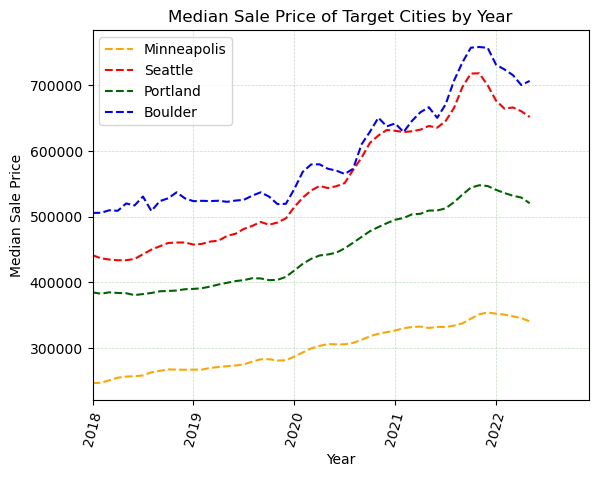

<Figure size 2000x600 with 0 Axes>

In [184]:
# plotting all 4 target cities meidan list prices over the entire course of the data
# converting the data to float type, float64 type was causing an error
mpls_sale.iloc[0, 5:] = mpls_sale.iloc[0, 5:].astype(float)
stl_sale.iloc[0, 5:] = stl_sale.iloc[0, 5:].astype(float)
prt_sale.iloc[0, 5:] = prt_sale.iloc[0, 5:].astype(float)
bldr_sale.iloc[0, 5:] = bldr_sale.iloc[0, 5:].astype(float)

# select the relevant columns for plotting
mpls_sale_data = mpls_sale.iloc[0, 5:]
stl_sale_data = stl_sale.iloc[0, 5:]
prt_sale_data = prt_sale.iloc[0, 5:]
bldr_sale_data = bldr_sale.iloc[0, 5:]

# create the line plots
plt.plot(mpls_sale_data, label='Minneapolis', color='orange', linestyle= "--")
plt.plot(stl_sale_data, label='Seattle', color='red', linestyle= "--")
plt.plot(prt_sale_data, label='Portland', color='darkgreen', linestyle= "--")
plt.plot(bldr_sale_data, label='Boulder', color='blue', linestyle= "--")

# add labels and a title
plt.xlabel('Year')
plt.ylabel('Median Sale Price')
plt.title('Median Sale Price of Target Cities by Year')

# create a list of x-tick labels with 6 month intervals
dates = pd.date_range(start='2018-03-31', end='2023-01-31', freq='12M')
labels = [date.strftime('%Y') for date in dates]

# convert the dates to integer positions representing the number of months since the start date
start = pd.Timestamp('2018-03-31')
positions = [(date - start).days // 30 for date in dates]

# set the x-ticks and labels
plt.xticks(positions, labels, rotation=75)

# set proporties for the grid 
plt.grid(alpha= .25, color = 'green', linestyle = '--', linewidth = 0.5)

# set the x-limits
plt.xlim(0, len(mpls_inv_data))

# add a legend
plt.legend(loc='best')

# set the figure size
plt.figure(figsize=(20, 6))

# show the plot
plt.show()



* Overlaying median listing prices with median sales prices

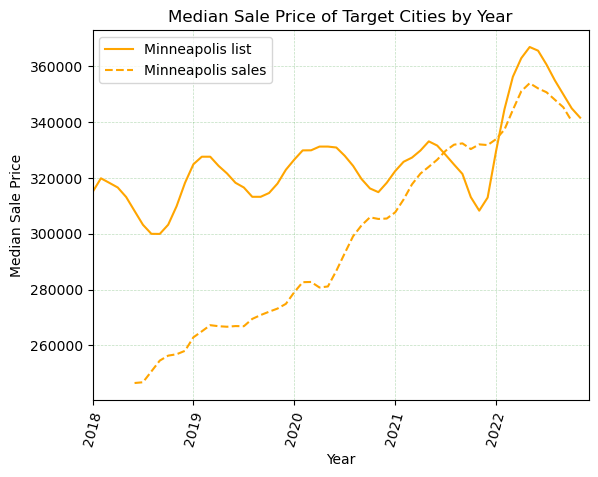

<Figure size 2000x600 with 0 Axes>

In [187]:
# Minneapolis listing vs sales prices
# create the line plots
plt.plot(mpls_lst_data, label='Minneapolis list', color='orange')
plt.plot(mpls_sale_data, label='Minneapolis sales', color='orange', linestyle= "--")

# add labels and a title
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Median List Price vs Sales Price for Minneapolis by Year')

# create a list of x-tick labels with 6 month intervals
dates = pd.date_range(start='2018-03-31', end='2023-01-31', freq='12M')
labels = [date.strftime('%Y') for date in dates]

# convert the dates to integer positions representing the number of months since the start date
start = pd.Timestamp('2018-03-31')
positions = [(date - start).days // 30 for date in dates]

# set the x-ticks and labels
plt.xticks(positions, labels, rotation=75)

# set proporties for the grid 
plt.grid(alpha= .25, color = 'green', linestyle = '--', linewidth = 0.5)

# set the x-limits
plt.xlim(0, len(mpls_inv_data))

# add a legend
plt.legend(loc='best')

# set the figure size
plt.figure(figsize=(20, 6))

# show the plot
plt.show()



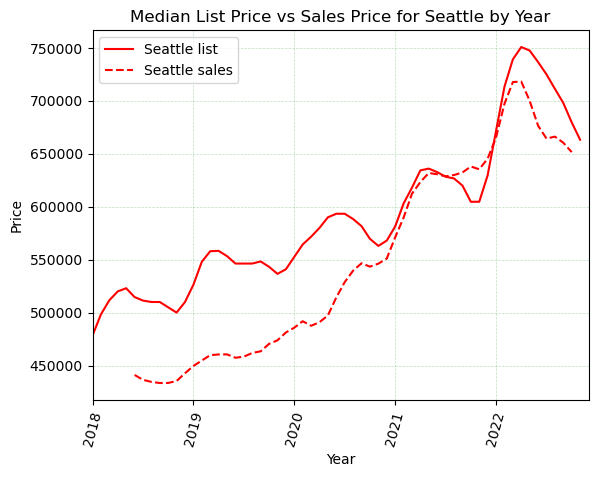

<Figure size 2000x600 with 0 Axes>

In [189]:
# Seattle listing vs sales prices
# create the line plots
plt.plot(stl_lst_data, label='Seattle list', color='red')
plt.plot(stl_sale_data, label='Seattle sales', color='red', linestyle= "--")

# add labels and a title
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Median List Price vs Sales Price for Seattle by Year')

# create a list of x-tick labels with 6 month intervals
dates = pd.date_range(start='2018-03-31', end='2023-01-31', freq='12M')
labels = [date.strftime('%Y') for date in dates]

# convert the dates to integer positions representing the number of months since the start date
start = pd.Timestamp('2018-03-31')
positions = [(date - start).days // 30 for date in dates]

# set the x-ticks and labels
plt.xticks(positions, labels, rotation=75)

# set proporties for the grid 
plt.grid(alpha= .25, color = 'green', linestyle = '--', linewidth = 0.5)

# set the x-limits
plt.xlim(0, len(mpls_inv_data))

# add a legend
plt.legend(loc='best')

# set the figure size
plt.figure(figsize=(20, 6))

# show the plot
plt.show()



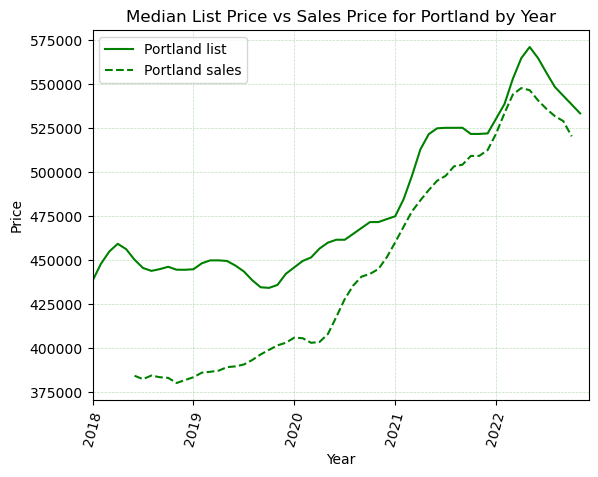

<Figure size 2000x600 with 0 Axes>

In [190]:
# Portland listing vs sales prices
# create the line plots
plt.plot(prt_lst_data, label='Portland list', color='green')
plt.plot(prt_sale_data, label='Portland sales', color='green', linestyle= "--")

# add labels and a title
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Median List Price vs Sales Price for Portland by Year')

# create a list of x-tick labels with 6 month intervals
dates = pd.date_range(start='2018-03-31', end='2023-01-31', freq='12M')
labels = [date.strftime('%Y') for date in dates]

# convert the dates to integer positions representing the number of months since the start date
start = pd.Timestamp('2018-03-31')
positions = [(date - start).days // 30 for date in dates]

# set the x-ticks and labels
plt.xticks(positions, labels, rotation=75)

# set proporties for the grid 
plt.grid(alpha= .25, color = 'green', linestyle = '--', linewidth = 0.5)

# set the x-limits
plt.xlim(0, len(mpls_inv_data))

# add a legend
plt.legend(loc='best')

# set the figure size
plt.figure(figsize=(20, 6))

# show the plot
plt.show()



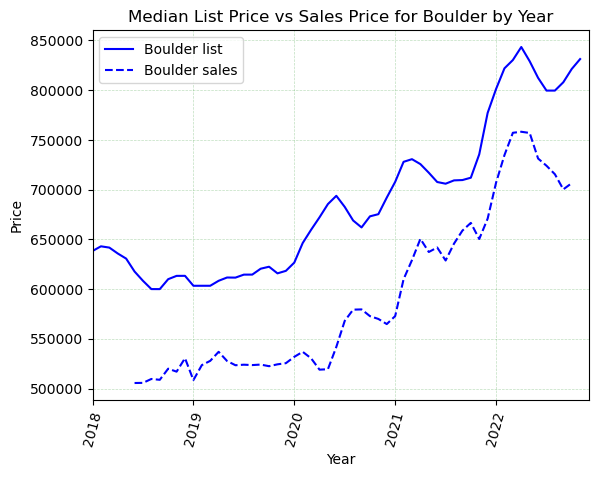

<Figure size 2000x600 with 0 Axes>

In [191]:
# Boulder listing vs sales prices
# create the line plots
plt.plot(bldr_lst_data, label='Boulder list', color='blue')
plt.plot(bldr_sale_data, label='Boulder sales', color='blue', linestyle= "--")

# add labels and a title
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Median List Price vs Sales Price for Boulder by Year')

# create a list of x-tick labels with 6 month intervals
dates = pd.date_range(start='2018-03-31', end='2023-01-31', freq='12M')
labels = [date.strftime('%Y') for date in dates]

# convert the dates to integer positions representing the number of months since the start date
start = pd.Timestamp('2018-03-31')
positions = [(date - start).days // 30 for date in dates]

# set the x-ticks and labels
plt.xticks(positions, labels, rotation=75)

# set proporties for the grid 
plt.grid(alpha= .25, color = 'green', linestyle = '--', linewidth = 0.5)

# set the x-limits
plt.xlim(0, len(mpls_inv_data))

# add a legend
plt.legend(loc='best')

# set the figure size
plt.figure(figsize=(20, 6))

# show the plot
plt.show()

